point cloud data is stored as a 2D matrix
each row has 3 values i.e. the x, y, z value for a point

Project has to be submitted to github in the private folder assigned to you
Readme file should have the numerical values as described in each task
Create a folder to store the images as described in the tasks.

Try to create commits and version for each task.

In [ ]:
import matplotlib
import numpy as np
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#%% utility functions
def show_cloud(points_plt):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], s=0.01)
    plt.show()

def show_scatter(x,y):
    plt.scatter(x, y)
    plt.show()

def get_ground_level(pcd,dataset):
    # get all z values aka height
    z_vals = pcd[:, 2]
    # histogram
    count, bins = np.histogram(z_vals, bins=100)
    #find max
    bin_idx = np.argmax(count)
    print("bin index with the highest count:", bin_idx)
    ground_level = (bins[bin_idx] + bins[bin_idx + 1]) / 2
    print("ground level estimated at:", ground_level)

   # Plot the histogram
    plt.hist(z_vals, bins=100)
    plt.axvline(ground_level, color='red', linestyle='--', linewidth=1.5)
    plt.xlabel('Height (z)')
    plt.ylabel('Number of points')
    plt.title(f'{dataset}: Height Distribution to Find Ground Level')
    plt.show()

    return ground_level

In [145]:
#%% read file containing point cloud data
pcd = np.load("dataset1.npy")

pcd.shape

(72067, 3)

In [146]:
pcd2 = np.load("dataset2.npy")

pcd2.shape

(84588, 3)

In [147]:
pcd[:5]  # [x,y,z] aka 0,1,2

array([[31.405, 80.054, 61.247],
       [30.961, 80.243, 61.185],
       [30.599, 80.412, 61.174],
       [30.258, 80.577, 61.145],
       [33.393, 80.217, 61.218]])

In [148]:
pcd2[:5]

array([[1.17020000e+01, 3.99999972e-03, 6.11420000e+01],
       [1.19060000e+01, 3.04000000e-01, 6.11520000e+01],
       [1.40860000e+01, 3.00000003e-02, 6.11040000e+01],
       [1.19350000e+01, 6.48000000e-01, 6.11070000e+01],
       [1.28780000e+01, 5.88000000e-01, 6.11780000e+01]])

In [149]:
# show z values
pcd[:5, 2] # first 5 rows of the z column

array([61.247, 61.185, 61.174, 61.145, 61.218])

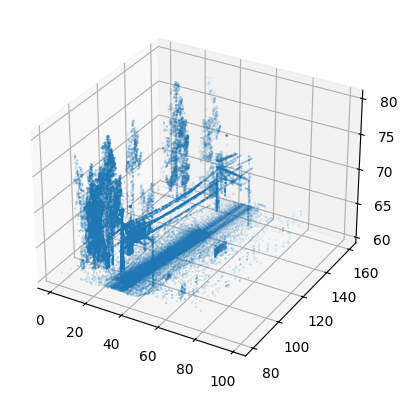

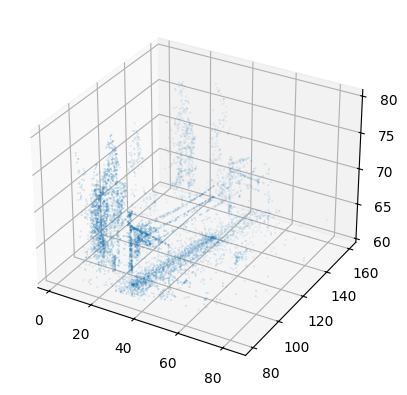

In [150]:
#%% show downsampled data in external window
%matplotlib inline
show_cloud(pcd)
show_cloud(pcd[::10]) # keep every 10th point

bin index with the highest count: 3
ground level estimated at: 61.24968500000003


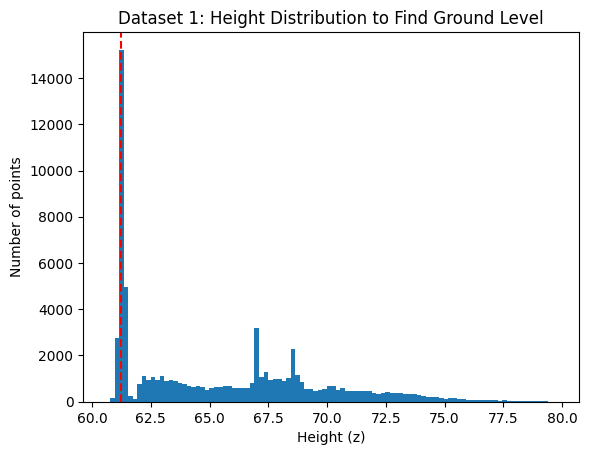

bin index with the highest count: 7
ground level estimated at: 61.26545


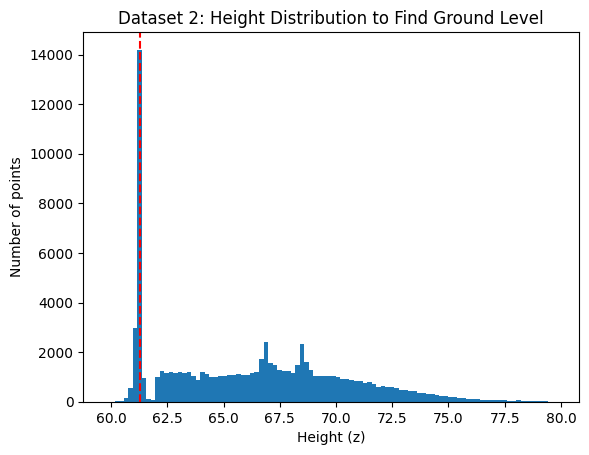

In [151]:
'''
Task 1 (3)
find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme
'''
# dataset 1
est_ground_level = get_ground_level(pcd, "Dataset 1")

pcd_above_ground = pcd[pcd[:,2] > est_ground_level] 

# dataset 2
est_ground_level_2 = get_ground_level(pcd2,"Dataset 2")

pcd2_above_ground = pcd2[pcd2[:,2] > est_ground_level_2] 

In [152]:
pcd_above_ground.shape

(62411, 3)

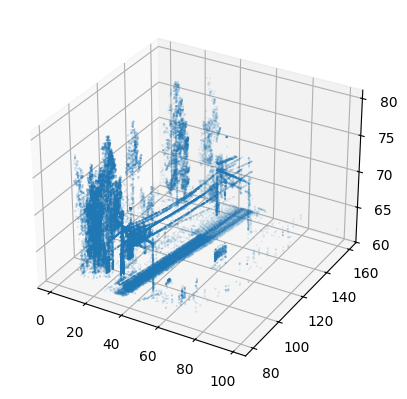

In [153]:
#%% side view
show_cloud(pcd_above_ground)

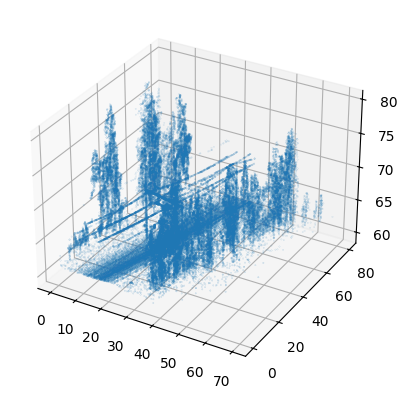

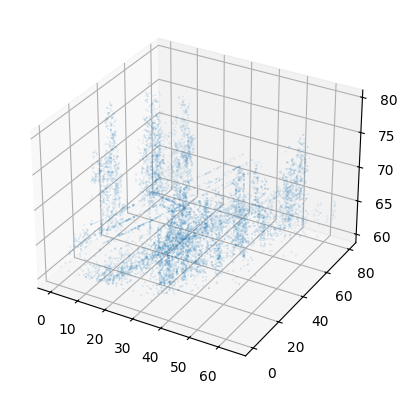

In [155]:
# Dataset 2
#%% show downsampled data in external window
%matplotlib inline
show_cloud(pcd2)
show_cloud(pcd2[::10]) # keep every 10th point

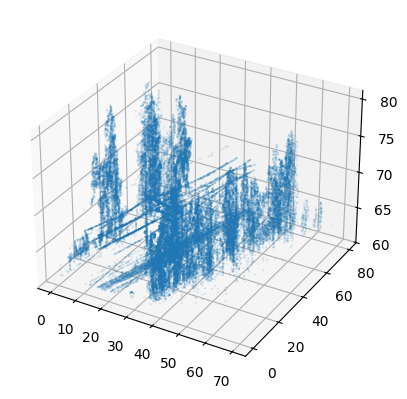

In [156]:
#%% Datset 2 side view
show_cloud(pcd2_above_ground)

TASK 2


In [157]:
# %%
unoptimal_eps = 10
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=5).fit(pcd_above_ground)


In [158]:
#%%
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]


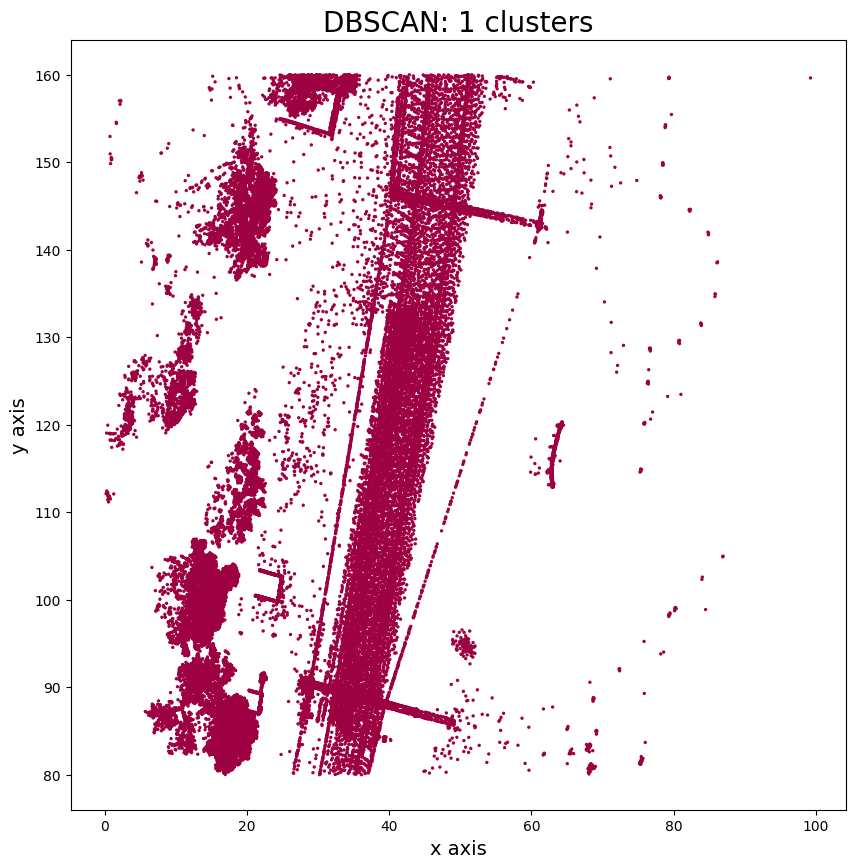

In [159]:
# %%
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0], 
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()


In [160]:
'''
Task 2 (+1)

Find an optimized value for eps.
Plot the elbow and extract the optimal value from the plot
Apply DBSCAN again with the new eps value and confirm visually that clusters are proper

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/

For both the datasets
Report the optimal value of eps in the Readme to your github project
Add the elbow plots to your github project Readme
Add the cluster plots to your github project Readme
'''



'\nTask 2 (+1)\n\nFind an optimized value for eps.\nPlot the elbow and extract the optimal value from the plot\nApply DBSCAN again with the new eps value and confirm visually that clusters are proper\n\nhttps://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/\nhttps://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/\n\nFor both the datasets\nReport the optimal value of eps in the Readme to your github project\nAdd the elbow plots to your github project Readme\nAdd the cluster plots to your github project Readme\n'

In [161]:
'''
Task 3 (+1)

Find the largest cluster, since that should be the catenary, 
beware of the noise cluster.

Use the x,y span for the clusters to find the largest cluster

For both the datasets
Report min(x), min(y), max(x), max(y) for the catenary cluster in the Readme of your github project
Add the plot of the catenary cluster to the readme

'''

'\nTask 3 (+1)\n\nFind the largest cluster, since that should be the catenary, \nbeware of the noise cluster.\n\nUse the x,y span for the clusters to find the largest cluster\n\nFor both the datasets\nReport min(x), min(y), max(x), max(y) for the catenary cluster in the Readme of your github project\nAdd the plot of the catenary cluster to the readme\n\n'